In [2]:
import pandas as pd

# Load the Parquet file into a Pandas DataFrame
df = pd.read_parquet("data/processed/lbsm_clean.parquet")

In [3]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming the DataFrame has 'latitude' and 'longitude' columns
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
                             

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Now you have a GeoDataFrame
print(gdf.head())

           UPRN       OS_TOPO_TOID   EASTING  NORTHING   LATITUDE  LONGITUDE  \
0  200000071748  osgb1000005894760  532193.0  182074.0  51.522122  -0.095973   
1  200000071808  osgb1000005894760  532193.0  182074.0  51.522122  -0.095973   
2  200000071807  osgb1000005894760  532193.0  182074.0  51.522122  -0.095973   
3  200000071718  osgb1000005894760  532193.0  182074.0  51.522122  -0.095973   
4  200000071750  osgb1000005894760  532193.0  182074.0  51.522122  -0.095973   

          OA       LSOA       MSOA  OAC  ...  \
0  E00000012  E01000003  E02000001  3B3  ...   
1  E00000012  E01000003  E02000001  3B3  ...   
2  E00000012  E01000003  E02000001  3B3  ...   
3  E00000012  E01000003  E02000001  3B3  ...   
4  E00000012  E01000003  E02000001  3B3  ...   

  AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA  \
0                                          D   
1                                          D   
2                                          D   
3                                     

In [4]:
gdf.info()
gdf.geometry
gdf["geometry"]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2360477 entries, 0 to 2360476
Data columns (total 34 columns):
 #   Column                                            Dtype   
---  ------                                            -----   
 0   UPRN                                              int64   
 1   OS_TOPO_TOID                                      object  
 2   EASTING                                           float64 
 3   NORTHING                                          float64 
 4   LATITUDE                                          float64 
 5   LONGITUDE                                         float64 
 6   OA                                                object  
 7   LSOA                                              object  
 8   MSOA                                              object  
 9   OAC                                               object  
 10  WARD_CODE                                         object  
 11  WARD                                      

0          POINT (-0.09597 51.52212)
1          POINT (-0.09597 51.52212)
2          POINT (-0.09597 51.52212)
3          POINT (-0.09597 51.52212)
4          POINT (-0.09597 51.52212)
                     ...            
2360472     POINT (-0.1605 51.53703)
2360473     POINT (-0.1605 51.53703)
2360474     POINT (-0.1605 51.53703)
2360475     POINT (-0.1605 51.53703)
2360476    POINT (-0.16054 51.53665)
Name: geometry, Length: 2360477, dtype: geometry

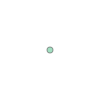

In [5]:
gdf["geometry"][0]


In [25]:
type(gdf["geometry"] [0])

shapely.geometry.point.Point

In [26]:
import geopandas as gpd
from shapely.affinity import translate

# Assuming 'gdf' is your GeoDataFrame and 'geometry' column contains polygons
gdf['geometry'] = gdf['geometry'].apply(lambda x: translate(x, xoff=10, yoff=5))  # Shift by 10 units in x, 5 units in y

In [ ]:
print(gdf.head())  
print(gdf.dtypes)  
print(gdf.geom_type.unique())  # Ensure the geometry types are what you expect  # Check what types of geometries are present  # Print the first polygon

In [1]:
from shapely.geometry import Polygon
polygon = Polygon(gdf[['LONGITUDE', 'LATITUDE']].values)  

NameError: name 'gdf' is not defined

In [37]:
gdf['geometry'] = polygon
print(gdf.geom_type.unique())  # Now it should return ['Polygon']

['Polygon']


In [38]:
import matplotlib.pyplot as plt

gdf.plot()
plt.show()

: 